# Custom Named Entity Recognition 

- Make Entity Ranking

# 1)- Import Key Modules

In [1]:
# for Python 2: use print only as a function
from __future__ import print_function

In [2]:
import spacy
from spacy.pipeline import EntityRuler
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

# 2)- Load Pre-trained Model

In [3]:
nlp = spacy.load('en_core_web_sm', disable = ['ner'])

# 3)- Defining custom entities

flowers and animals in our case

### a.list classes

In [4]:
flowers = ["rose", "tulip", "african daisy"]
animals = ["cat", "dog", "artic fox"]

### b.instantiate ruler

In [5]:
rulerAll = EntityRuler(nlp, overwrite_ents=True)

### c.add pattern

In [6]:
for f in flowers:
    rulerAll.add_patterns([{"label": "flower", "pattern": f}])
for a in animals:
    rulerAll.add_patterns([{"label": "animal", "pattern": a}])

In [7]:
print(nlp.pipe_names)

['tagger', 'parser']


**We have no ruler added so far**

### d. Give a custom name for ruler

In [8]:
# in this case, we shall use same ruler for all classes
rulerAll.name = 'rulerAll'

### e. Add ruler name to nlp pipeline

In [9]:
nlp.add_pipe(rulerAll)

In [10]:
print(nlp.pipe_names)

['tagger', 'parser', 'rulerAll']


# 4)- Test on Text

In [11]:
text="cat, fox, dog, wolf and artic fox are one class.And plant, african daisy, rose ,tulip, gardenias are other class. Some entities might repeat for testing such as dog, tulip,dog,cat,tulip."

In [12]:
# convert to spacy token
doc=nlp(text)

In [13]:
for ent in doc.ents:
    print(ent.text , '->', ent.label_,'start',ent.start,'end',ent.end)

cat -> animal start 0 end 1
dog -> animal start 4 end 5
artic fox -> animal start 8 end 10
african daisy -> flower start 17 end 19
rose -> flower start 20 end 21
tulip -> flower start 22 end 23
dog -> animal start 37 end 38
tulip -> flower start 39 end 40
dog -> animal start 41 end 42
cat -> animal start 43 end 44
tulip -> flower start 45 end 46


## Visualize results

In [14]:
doc.user_data["Entity Extraction"] = "Entities for Flowers and Animals"
displacy.render(doc,style='ent',jupyter=True)

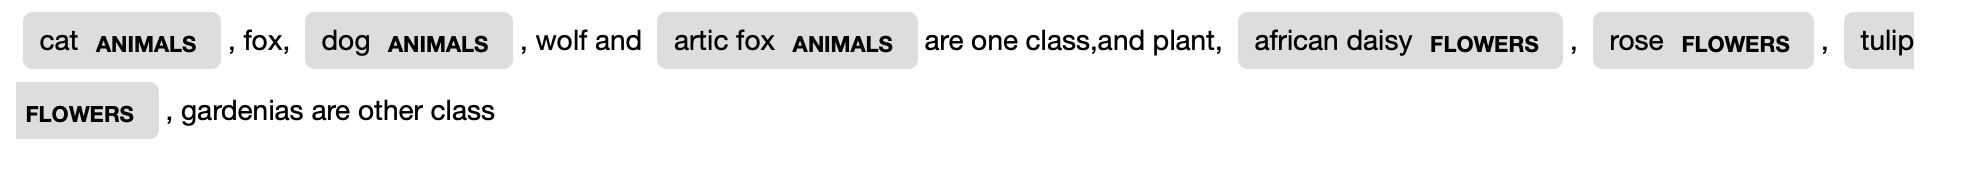

In [15]:
from IPython.display import Image
Image(filename='ner1.png') 

# 5)- Count of Entities

### 5a.Using Entity Type 

In [16]:
from collections import Counter
import pandas as pd

In [17]:
count = [token.text for token in doc if token.ent_type_ == "flower" or token.ent_type_ == "animal" ]

In [18]:
count_freq = Counter(count)
common_ents = count_freq.most_common(10)

In [19]:
df_ent_counts=pd.DataFrame(common_ents, columns=['entity-type','count'])
df_ent_counts

,entity-type,count
0,dog,3
1,tulip,3
2,cat,2
3,artic,1
4,fox,1
5,african,1
6,daisy,1
7,rose,1


- african daisy is taken as separate token entity and hence occured only once

- We expected ""african daisy"" to be an entity and not separated by tokens

###  5b. convert to json

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html

In [20]:
df_ent_counts.to_json(orient='split')

'{"columns":["entity-type","count"],"index":[0,1,2,3,4,5,6,7],"data":[["dog",3],["tulip",3],["cat",2],["artic",1],["fox",1],["african",1],["daisy",1],["rose",1]]}'

In [21]:
df_ent_counts.to_json(orient='records')

'[{"entity-type":"dog","count":3},{"entity-type":"tulip","count":3},{"entity-type":"cat","count":2},{"entity-type":"artic","count":1},{"entity-type":"fox","count":1},{"entity-type":"african","count":1},{"entity-type":"daisy","count":1},{"entity-type":"rose","count":1}]'

In [22]:
df_ent_counts.to_json(orient='index')

'{"0":{"entity-type":"dog","count":3},"1":{"entity-type":"tulip","count":3},"2":{"entity-type":"cat","count":2},"3":{"entity-type":"artic","count":1},"4":{"entity-type":"fox","count":1},"5":{"entity-type":"african","count":1},"6":{"entity-type":"daisy","count":1},"7":{"entity-type":"rose","count":1}}'

In [23]:
df_ent_counts.to_json(orient='columns')

'{"entity-type":{"0":"dog","1":"tulip","2":"cat","3":"artic","4":"fox","5":"african","6":"daisy","7":"rose"},"count":{"0":3,"1":3,"2":2,"3":1,"4":1,"5":1,"6":1,"7":1}}'

### Fixing token problem

In [24]:
[ent for ent in doc.ents if ent.label_ == "flower"]

[african daisy, rose, tulip, tulip, tulip]

In [25]:
len([ent for ent in doc.ents if ent.label_ == "flower"])

5

In [26]:
[ent for ent in doc.ents if ent.label_ == "flower" or ent.label_ == "animal"]

[cat, dog, artic fox, african daisy, rose, tulip, dog, tulip, dog, cat, tulip]

In [27]:
count_ent2=[ent for ent in doc.ents if ent.label_ == "flower" or ent.label_ == "animal"]

In [28]:
count_freq = Counter(count_ent2)
count_freq

Counter({cat: 1,
         dog: 1,
         artic fox: 1,
         african daisy: 1,
         rose: 1,
         tulip: 1,
         dog: 1,
         tulip: 1,
         dog: 1,
         cat: 1,
         tulip: 1})

In [29]:
type(count_freq)

collections.Counter

In [30]:
d=count_freq

In [31]:
dic_count= dict(d)
dic_count

{cat: 1,
 dog: 1,
 artic fox: 1,
 african daisy: 1,
 rose: 1,
 tulip: 1,
 dog: 1,
 tulip: 1,
 dog: 1,
 cat: 1,
 tulip: 1}

In [32]:
type(dic_count)

dict

In [33]:
df_ent_freq = pd.DataFrame.from_dict(d, orient='index').reset_index()
df_ent_freq

,index,0
0,(cat),1
1,(dog),1
2,"(artic, fox)",1
3,"(african, daisy)",1
4,(rose),1
5,(tulip),1
6,(dog),1
7,(tulip),1
8,(dog),1
9,(cat),1


In [34]:
df_ent = df_ent_freq.rename(columns={'index':'Entity_type', 0:'Count'})
df_ent

,Entity_type,Count
0,(cat),1
1,(dog),1
2,"(artic, fox)",1
3,"(african, daisy)",1
4,(rose),1
5,(tulip),1
6,(dog),1
7,(tulip),1
8,(dog),1
9,(cat),1


In [35]:
df_ent.dtypes

Entity_type    object
Count           int64
dtype: object

In [36]:
type(df_ent.Entity_type)

pandas.core.series.Series

### 5c. Using Pandas

For Entity Frequency

In [37]:
labels = [x.label_ for x in doc.ents]
Counter(labels)

Counter({'animal': 6, 'flower': 5})

In [38]:
d=Counter(labels)

In [39]:
df_ent = pd.DataFrame.from_dict(d, orient='index').reset_index()
df_ent

,index,0
0,animal,6
1,flower,5


In [40]:
df_ent = df_ent.rename(columns={'index':'Entity_name', 0:'Count'})
df_ent

,Entity_name,Count
0,animal,6
1,flower,5


In [41]:
df_ent.dtypes

Entity_name    object
Count           int64
dtype: object

### 5d.Using TextRanking

In [42]:
import pytextrank
tr = pytextrank.TextRank()

In [43]:
nlp.add_pipe(tr.PipelineComponent, name='textrank',last=True)

In [44]:
print(nlp.pipe_names)

['tagger', 'parser', 'rulerAll', 'textrank']


In [45]:
text="cat, fox, dog, wolf and artic fox are one class.And plant, african daisy, rose ,tulip, gardenias are other class. Some entities might repeat for testing such as dog, tulip,dog,cat,tulip."

In [46]:
doc=nlp(text)

In [47]:
for ent in doc._.phrases:
    print("Name of Entity","->", ent.text , ':',"Rank of Entity","->", ent.rank, ':',"Counts","->", ent.count)
    print("How different entity types occur", ent.chunks)
    print("\n")

Name of Entity -> artic fox : Rank of Entity -> 0.16009912161018636 : Counts -> 1
How different entity types occur [artic fox]


Name of Entity -> fox : Rank of Entity -> 0.1459217924365369 : Counts -> 2
How different entity types occur [fox, fox]


Name of Entity -> african daisy : Rank of Entity -> 0.14373854418985538 : Counts -> 2
How different entity types occur [african daisy, african daisy]


Name of Entity -> dog : Rank of Entity -> 0.13389838729257922 : Counts -> 4
How different entity types occur [dog, dog, dog, dog]


Name of Entity -> tulip : Rank of Entity -> 0.13387256793414054 : Counts -> 4
How different entity types occur [tulip, tulip, tulip, tulip]


Name of Entity -> other class : Rank of Entity -> 0.13369333673886796 : Counts -> 1
How different entity types occur [other class]


Name of Entity -> wolf : Rank of Entity -> 0.11444219463050212 : Counts -> 1
How different entity types occur [wolf]


Name of Entity -> testing : Rank of Entity -> 0.10910263189504002 : Coun

**Creating DataFrame**

In [48]:
df_ranking = pd.DataFrame({'entity': [], 'counts': [], 'confidence': []})
df_ranking

,entity,counts,confidence


In [49]:
for ent in doc._.phrases:
    df_ranking=df_ranking.append({'entity':ent.text,'counts':ent.count, 'confidence':ent.rank}, ignore_index=True)

In [50]:
df_ranking

,entity,counts,confidence
0,artic fox,1.0,0.160099
1,fox,2.0,0.145922
2,african daisy,2.0,0.143739
3,dog,4.0,0.133898
4,tulip,4.0,0.133873
5,other class,1.0,0.133693
6,wolf,1.0,0.114442
7,testing,1.0,0.109103
8,rose,1.0,0.108346
9,plant,1.0,0.093232


**use counter**

In [51]:
rank_ent=[x.text for x in doc._.phrases]
Counter(rank_ent)

Counter({'artic fox': 1,
         'fox': 1,
         'african daisy': 1,
         'dog': 1,
         'tulip': 1,
         'other class': 1,
         'wolf': 1,
         'testing': 1,
         'rose': 1,
         'plant': 1,
         'cat': 1,
         'cat,tulip': 1,
         'one class': 1,
         'some entities': 1})

In [52]:
r=Counter(rank_ent)
df_rank = pd.DataFrame.from_dict(r, orient='index').reset_index()
df_rank

,index,0
0,artic fox,1
1,fox,1
2,african daisy,1
3,dog,1
4,tulip,1
5,other class,1
6,wolf,1
7,testing,1
8,rose,1
9,plant,1


In [53]:
df_rank2 = df_rank.rename(columns={'index':'key', 0:'values'})
df_rank2

,key,values
0,artic fox,1
1,fox,1
2,african daisy,1
3,dog,1
4,tulip,1
5,other class,1
6,wolf,1
7,testing,1
8,rose,1
9,plant,1


# 6)- Creating table with Entity Class and Entity Type

- Key=Entity Class
- Value= Entity Type
- Condifence= normalized value

In [54]:
# Entity type
ent_type=[ent for ent in doc.ents if ent.label_ == "flower" or ent.label_ == "animal"]
ent_type

[cat, dog, artic fox, african daisy, rose, tulip, dog, tulip, dog, cat, tulip]

In [55]:
type(ent_type)

list

In [56]:
#Entity class
ent_class=[x.label_ for x in doc.ents]
ent_class

['animal',
 'animal',
 'animal',
 'flower',
 'flower',
 'flower',
 'animal',
 'flower',
 'animal',
 'animal',
 'flower']

In [57]:
df_table = pd.DataFrame({'key': [], 'value': []})
df_table

,key,value


In [62]:
df_table['entity']=[x.text for x in doc.ents]
df_table['key']=[x.label_ for x in doc.ents]
df_table['value']=[ent for ent in doc.ents if ent.label_ == "flower" or ent.label_ == "animal"]
df_table['start']=[x.start_char for x in doc.ents]
df_table['end']=[x.end_char for x in doc.ents]

In [63]:
df_table

,key,value,entity,start,end
0,animal,(cat),cat,0,3
1,animal,(dog),dog,10,13
2,animal,"(artic, fox)",artic fox,24,33
3,flower,"(african, daisy)",african daisy,59,72
4,flower,(rose),rose,74,78
5,flower,(tulip),tulip,80,85
6,animal,(dog),dog,161,164
7,flower,(tulip),tulip,166,171
8,animal,(dog),dog,172,175
9,animal,(cat),cat,176,179


# END of NOEBOOK